# Dogs vs. Cats Redux

## Kaggle Competition

In [33]:
%matplotlib inline
path = 'data/dogscats/sample/'
# path = 'data/dogscats/'

train_path = path + 'train/'
valid_path = path + 'valid/'
test_path = path + 'test/'
results_path = path + 'results/'

In [2]:
from utils import *
from vgg16 import Vgg16

Using Theano backend.


In [3]:
batch_size = 64
num_epoch = 8

In [4]:
vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.model.optimizer.lr = 0.005

vgg.fit(batches, val_batches, nb_epoch=num_epoch)

/home/ubuntu/anaconda2/envs/fastai/lib/python2.7/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 104s - loss: 1.2046 - acc: 0.6500 - val_loss: 0.0488 - val_acc: 0.9800
Epoch 2/3
200/200 [==============================] - 102s - loss: 0.2757 - acc: 0.9150 - val_loss: 0.0340 - val_acc: 0.9800
Epoch 3/3
200/200 [==============================] - 102s - loss: 0.1371 - acc: 0.9500 - val_loss: 0.0464 - val_acc: 0.9600


In [6]:
batches, preds = vgg.test(test_path, batch_size=batch_size*2)
filenames = batches.filenames

isdog = preds[:,1]
isdog = isdog.clip(min=0.05, max=0.95)
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

Found 50 images belonging to 1 classes.


In [7]:
subm = np.stack([ids, isdog], axis=1)

In [8]:
submission_file_name = results_path+'dogscats_sub1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [9]:
imgs = next(batches)

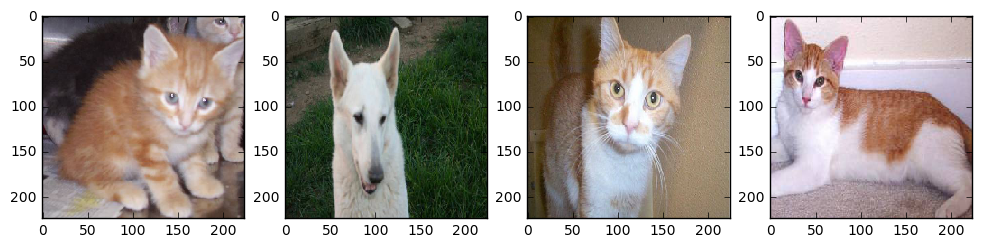

In [11]:
plots(imgs[:4])

In [14]:
print preds[:4]
print filenames[:4]

[[  1.0000e+00   9.7893e-07]
 [  3.0632e-04   9.9969e-01]
 [  1.0000e+00   4.8561e-08]
 [  1.0000e+00   4.5631e-07]]
['unknown/448.jpg', 'unknown/3939.jpg', 'unknown/6262.jpg', 'unknown/2044.jpg']


In [34]:
batches, preds = vgg.test(valid_path, batch_size=batch_size*2)

Found 50 images belonging to 2 classes.


In [37]:
filenames = batches.filenames
expected_labels = batches.classes

my_preds = preds[:,0]
my_labels = np.round(1-my_preds)

In [38]:
from keras.preprocessing import image

def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
n_view = 4

Found 48 correct lables


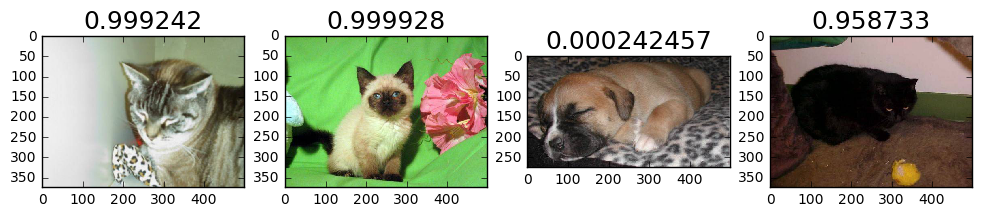

In [48]:
correct = np.where(my_labels == expected_labels)[0]
print "Found %d correct lables" % len(correct)
idx = permutation(correct)[:n_view]
plots_idx(idx, my_preds[idx])

Found 2 incorrect lables


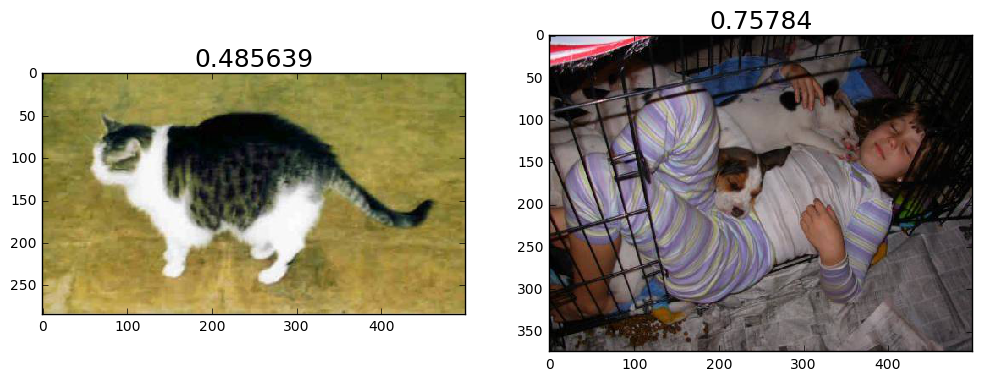

In [50]:
incorrect = np.where(my_labels != expected_labels)[0]
print "Found %d incorrect lables" % len(incorrect)
idx = permutation(incorrect)[:n_view]
plots_idx(idx, my_preds[idx])

Found 23 correct cats labels


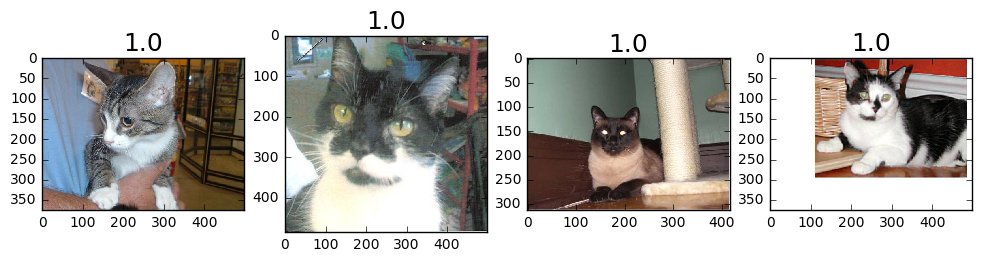

In [54]:
correct_cats = np.where((my_labels==0) & (my_labels==expected_labels))[0]
print "Found %d correct cats labels" % len(correct_cats)
most_correct_cats = np.argsort(my_preds[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], my_preds[correct_cats][most_correct_cats])

Found 25 correct dogs labels


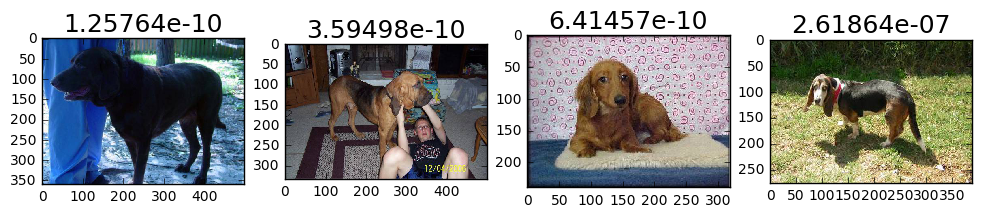

In [57]:
correct_dogs = np.where((my_labels==1) & (my_labels==expected_labels))[0]
print "Found %d correct dogs labels" % len(correct_dogs)
most_correct_dogs = np.argsort(my_preds[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], my_preds[correct_dogs][most_correct_dogs])

Found 1 incorrect cats


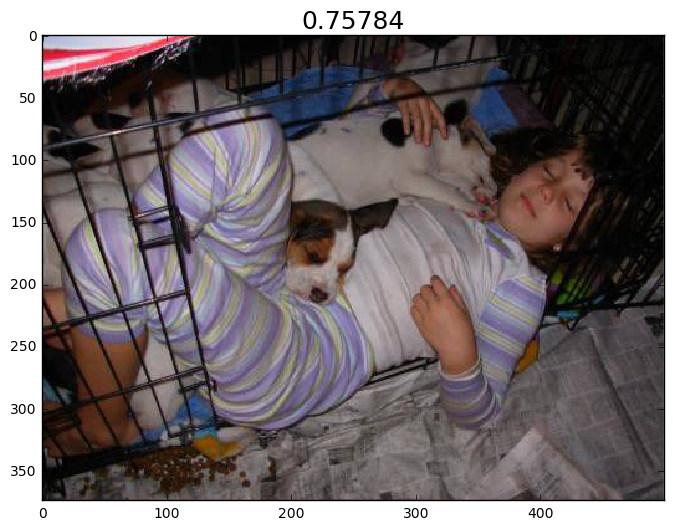

In [58]:
incorrect_cats = np.where((my_labels==0) & (my_labels!=expected_labels))[0]
print "Found %d incorrect cats" % len(incorrect_cats)
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(my_preds[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], my_preds[incorrect_cats][most_incorrect_cats])

Found 1 incorrect dogs


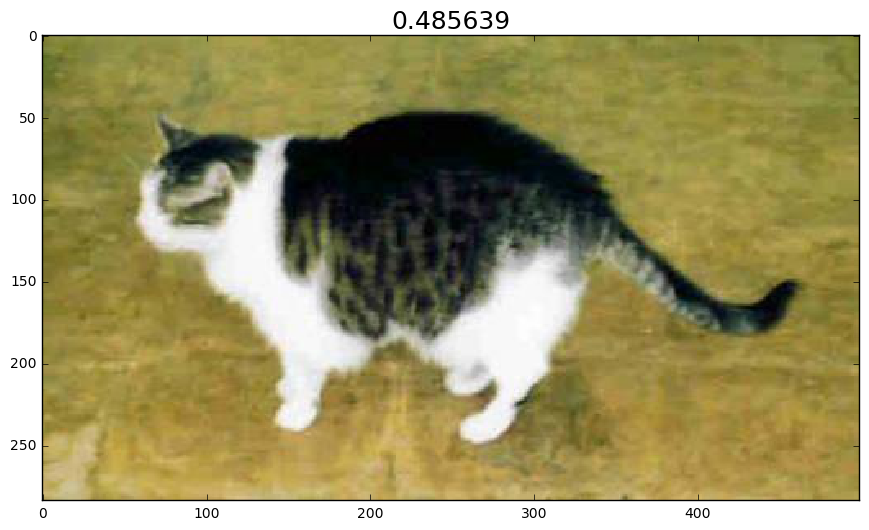

In [59]:
incorrect_dogs = np.where((my_labels==1) & (my_labels!=expected_labels))[0]
print "Found %d incorrect dogs" % len(incorrect_dogs)
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(my_preds[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], my_preds[incorrect_dogs][most_incorrect_dogs])

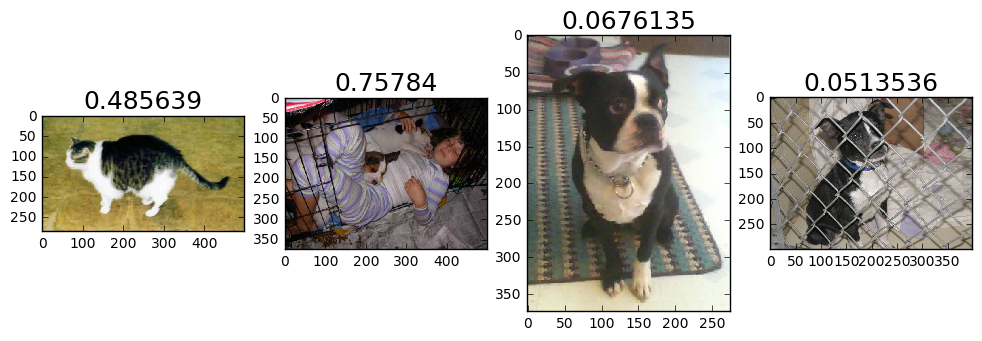

In [60]:
most_uncertain = np.argsort(np.abs(my_preds-0.5))
plots_idx(most_uncertain[:n_view], my_preds[most_uncertain])

[[23  1]
 [ 1 25]]


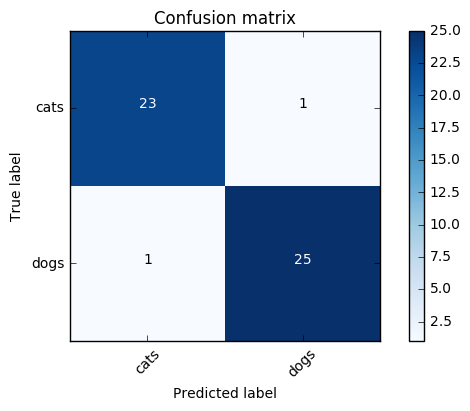

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, my_labels)
plot_confusion_matrix(cm, batches.class_indices)